In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai',context='notebook',ticks=True,grid=False)

In [2]:
tweets_df = pd.read_csv('twitter.csv')

In [5]:
tweets_df = tweets_df.drop(['id'],axis=1)

<AxesSubplot:>

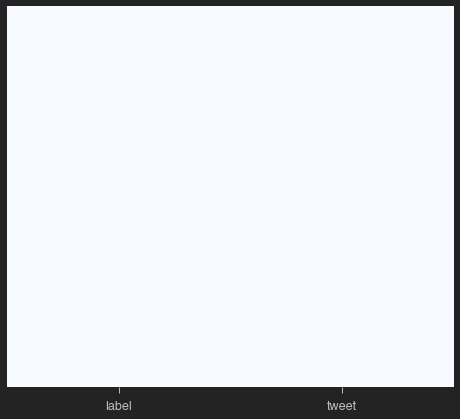

In [9]:
sns.heatmap(tweets_df.isnull(),yticklabels=False,cbar=False,cmap='Blues')

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

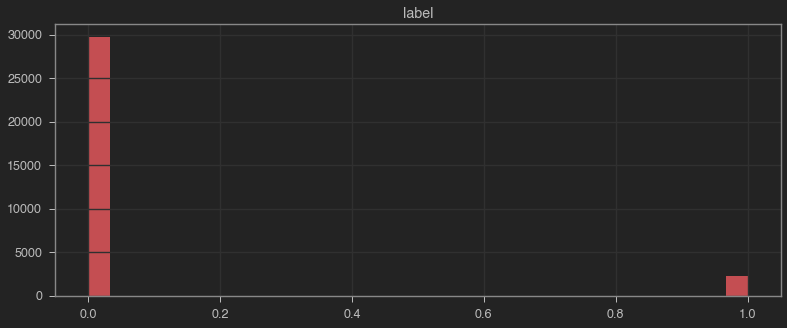

In [10]:
tweets_df.hist(bins=30,figsize=(13,5),color='r')

/Users/hoanmytran/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

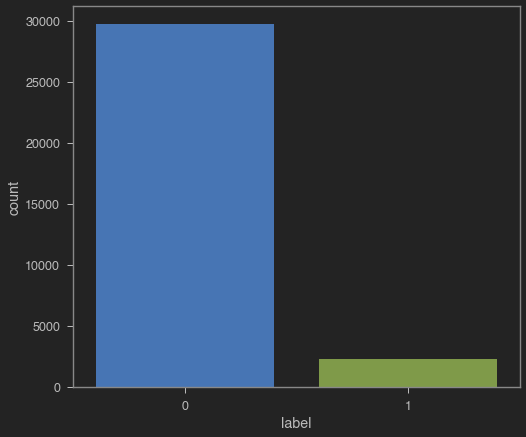

In [11]:
sns.countplot(tweets_df['label'],label='Count')

In [12]:
tweets_df['length'] = tweets_df['tweet'].apply(len)

<AxesSubplot:ylabel='Frequency'>

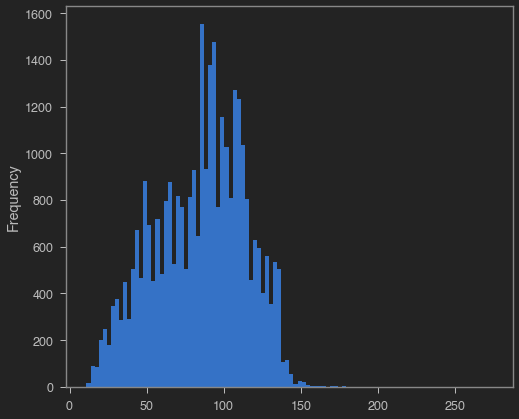

In [14]:
tweets_df['length'].plot(bins=100,kind='hist')

In [18]:
tweets_df[tweets_df['length']==11]['tweet'].iloc[0]

'i love you '

In [19]:
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [20]:
tweets_df[tweets_df['length']==84]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

In [21]:
positive = tweets_df[tweets_df['label']==0]

In [23]:
negative = tweets_df[tweets_df['label']==1]

In [24]:
sentences = tweets_df['tweet'].tolist()

In [27]:
sentences_as_one_string = " ".join(sentences)

In [29]:
!pip install WordCloud

     |████████████████████████████████| 220 kB 1.0 MB/s eta 0:00:01
  Created wheel for WordCloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=158795 sha256=5f4c428167ec70da61414912ace6b90144cdfff5739bb580a411ef109a23e61a
  Stored in directory: /Users/hoanmytran/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built WordCloud


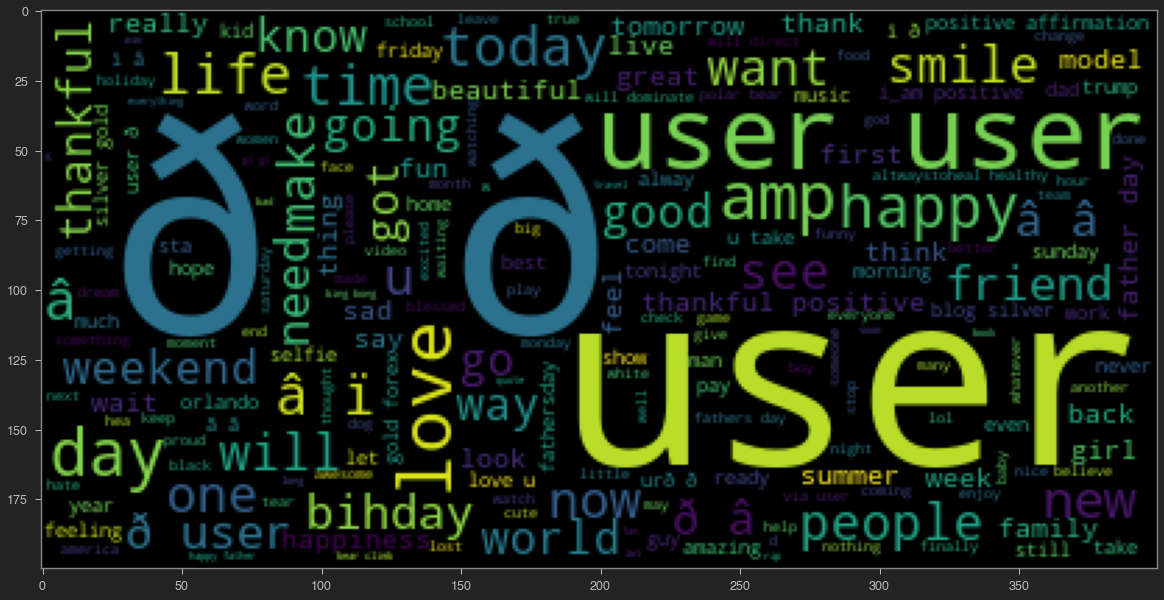

In [30]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

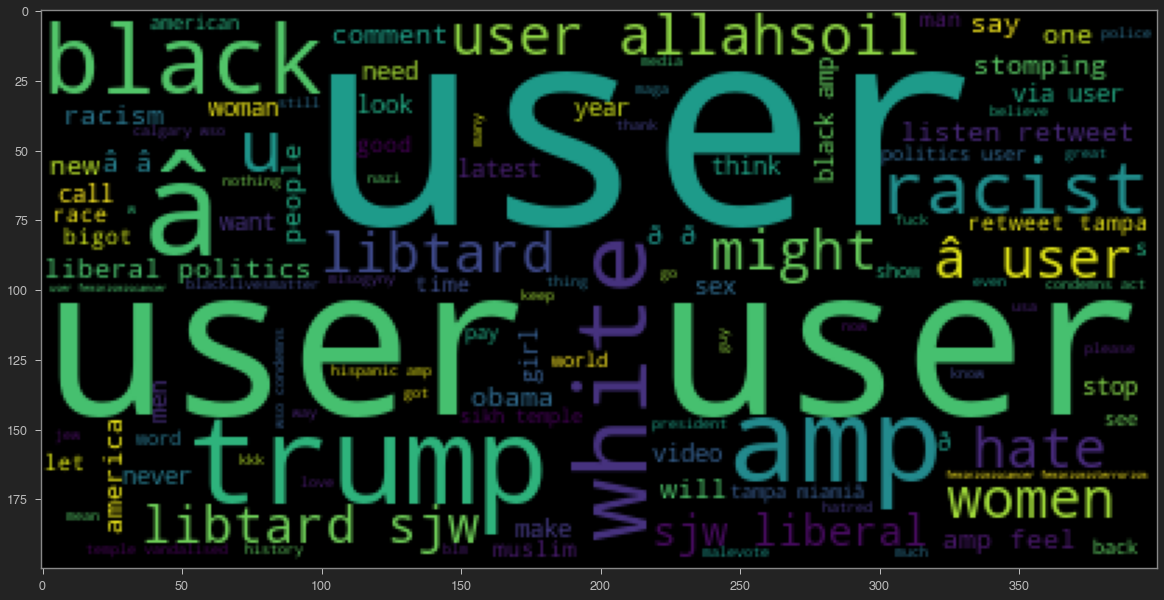

In [31]:
negative_list = negative['tweet'].tolist()
negative_sentences_as_one_string = ' '.join(negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

In [32]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI'

In [34]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]

In [46]:
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine learning and AI'

In [47]:
Test_punc_removed = []
for char in Test:
    if char not in string.punctuation:
        Test_punc_removed.append(char)
        
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine learning and AI'

In [42]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hoanmytran/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [48]:
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [49]:
Test_punc_removed_join_clean

['Good',
 'morning',
 'beautiful',
 'people',
 'fun',
 'learning',
 'Machine',
 'learning',
 'AI']

In [60]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

In [61]:
challenge = [char for char in mini_challenge if char not in string.punctuation]

In [62]:
challenge = ''.join(challenge)

In [63]:
challenge = [word for word in challenge.split() if word.lower() not in stopwords.words('english')]

In [64]:
challenge

['mini', 'challenge', 'teach', 'remove', 'stopwords', 'punctuations']

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This paper is the second paper.','And this is the third one.','Is this the first paper?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [67]:
print(vectorizer.get_feature_names())

['and', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [68]:
print(X.toarray())

[[0 1 1 0 1 0 1 0 1]
 [0 0 1 0 2 1 1 0 1]
 [1 0 1 1 0 0 1 1 1]
 [0 1 1 0 1 0 1 0 1]]


In [69]:
mini_challenge = ['Hello World','Hello Hello World','Hello World world world']
vectorizer_challenge = CountVectorizer()
X_challenge = vectorizer_challenge.fit_transform(mini_challenge)
print(X_challenge.toarray())

[[1 1]
 [2 1]
 [1 3]]


In [70]:
def message_cleaning(message):
    message_punc_removed = [char for char in message if char not in string.punctuation]
    message_punc_removed_join = ''.join(message_punc_removed)
    message_punc_removed_join_clean = [word for word in message_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return message_punc_removed_join_clean

In [72]:
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [73]:
print(tweets_df_clean[5])

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [74]:
print(tweets_df['tweet'][5])

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [75]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer=message_cleaning)
tweets_count_vectorizer = CountVectorizer(analyzer=message_cleaning, dtype='uint8').fit_transform(tweets_df['tweet']).toarray()

In [76]:
tweets_count_vectorizer.shape

(31962, 47386)

In [77]:
X = tweets_count_vectorizer

In [79]:
y = tweets_df['label']

In [82]:
X.shape

(31962, 47386)

In [83]:
y.shape

(31962,)

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [86]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

In [87]:
from sklearn.metrics import classification_report,confusion_matrix

<AxesSubplot:>

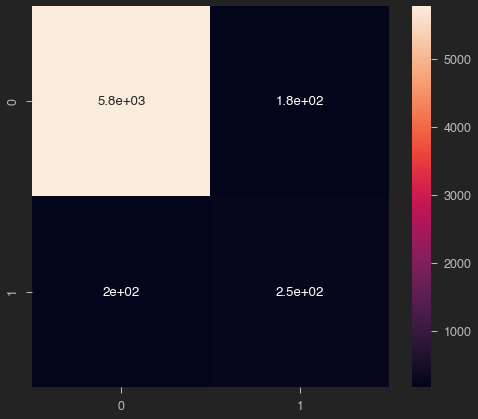

In [88]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)

In [89]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5946
           1       0.58      0.55      0.57       447

    accuracy                           0.94      6393
   macro avg       0.77      0.76      0.77      6393
weighted avg       0.94      0.94      0.94      6393

